In [80]:
import numpy as np
import matplotlib.pyplot as plt

Определим одномерную функцию ${f(x)}$ и ее производную, вычисленную аналитически:

In [81]:
def f(x):
    return -0.5*x**3 - 3*x**2 - 5*x + 3

def f_deriv(x):
    return -1.5*x**2 - 6*x - 5

Рассмотрим метод
__[numpy.gradient](https://numpy.org/doc/2.0/reference/generated/numpy.gradient.html#numpy-gradient)__
на примере массива небольшого размера.
В одномерном случае результатом является массив значений производной в каждой точке входного массива.
Вычисления привязаны к шагу аргумента дифференцируемой функции. В случае постоянного шага имеется возможность задавать его одной константой.

In [110]:
N_point_grad = [2, 3, 4, 5]
for n in N_point_grad:
    x = np.linspace(0, 0.1, n)
    x_step = x[1] - x[0]
    y = f(x)
    print('Number of points:', n)
    print('numpy.gradient:', np.gradient(y, x_step))
    print('Derivative:', f_deriv(x))


Number of points: 2
numpy.gradient: [1.71 1.71]
Derivative: [2.   1.43]
Number of points: 3
numpy.gradient: [1.8525 1.71   1.5675]
Derivative: [2.     1.7075 1.43  ]
Number of points: 4
numpy.gradient: [1.90111111 1.80444444 1.61444444 1.52111111]
Derivative: [2.         1.80333333 1.61333333 1.43      ]
Number of points: 5
numpy.gradient: [1.925625 1.8525   1.708125 1.5675   1.498125]
Derivative: [2.       1.851875 1.7075   1.566875 1.43    ]


Анализируя результаты можно сделать следующие выводы:
- Крайние точки в массиве градиента отличаются значительно от точного значения производной. Массив из 2х точек недопустим.
- Приминительно к задачи нахождения градиента в точке оптимальный размер массива: 3. При этом, набольшая точность у второго с конца значения.

Визуализируем значения градиента и производной:

<function matplotlib.pyplot.show(close=None, block=None)>

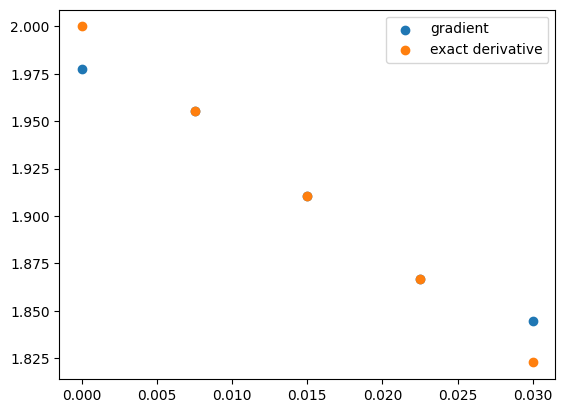

In [114]:
x = np.linspace(0, 0.03, 5)
x_step = x[1] - x[0]
plt.scatter(x, np.gradient(f(x), x_step))
plt.scatter(x, f_deriv(x))
plt.legend(['gradient', 'exact derivative'])
plt.show